# DATA SCIENCE PROJECT ON CELL PHONE PRICE

## Business Case: To Predict Price Range over Mobile Phones based on features

## Linear Regression Task

## Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

## Loading  the Data

In [2]:
data=pd.read_csv("datasets_11167_15520_train.csv")

In [5]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
pd.set_option('display.max_columns',None)

In [7]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## Domain Analysis
battery_power: Total energy a battery can store in onetime measured in mAh

blue : has bluetooth or not

clock_speed: speed at which microprocessor executes the instructions

dual_sim: has dual sim or not

fc :front camera mega pixels

four_g : has 4g or not

int_memory : internal memory in Gigabytes

m_dep :mobile depth in cm

mobile_wt : weight of mobile phone

n_cores :number of cores processor

pc: pixel camera mega pixels

px_height: pixel resolution height

px_width : pixel resolution Width

ram: random access memotry in gigabytes

sc_h: screen height of mobile in cm

sc_w: screen width of mobile in cm

talk_time:longest time that single battey charge will last

three_g:has 3g support or not

touch_screen:has touch screen or not

wifi:has wifi or not

price_range:this is the target variable which represents (0-low cost),(1-medium cost),(2-high cost),(3-very high cost)

## Basic checks

In [8]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [9]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

##### it seems no missing values in the dataset

In [11]:
data.describe() #stastical information on Numerical data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Exploratory Data Analysis
It is Single linear Regression task as its target variable is price_range

#### 1.Univariate Analysis

In [13]:
import sweetviz as sv #importing sweetviz libraries
my_report=sv.analyze(data) #syntax for sweetviz
my_report.show_html() #default arguments will generate to sweetviz.html

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## checking distribution of curve

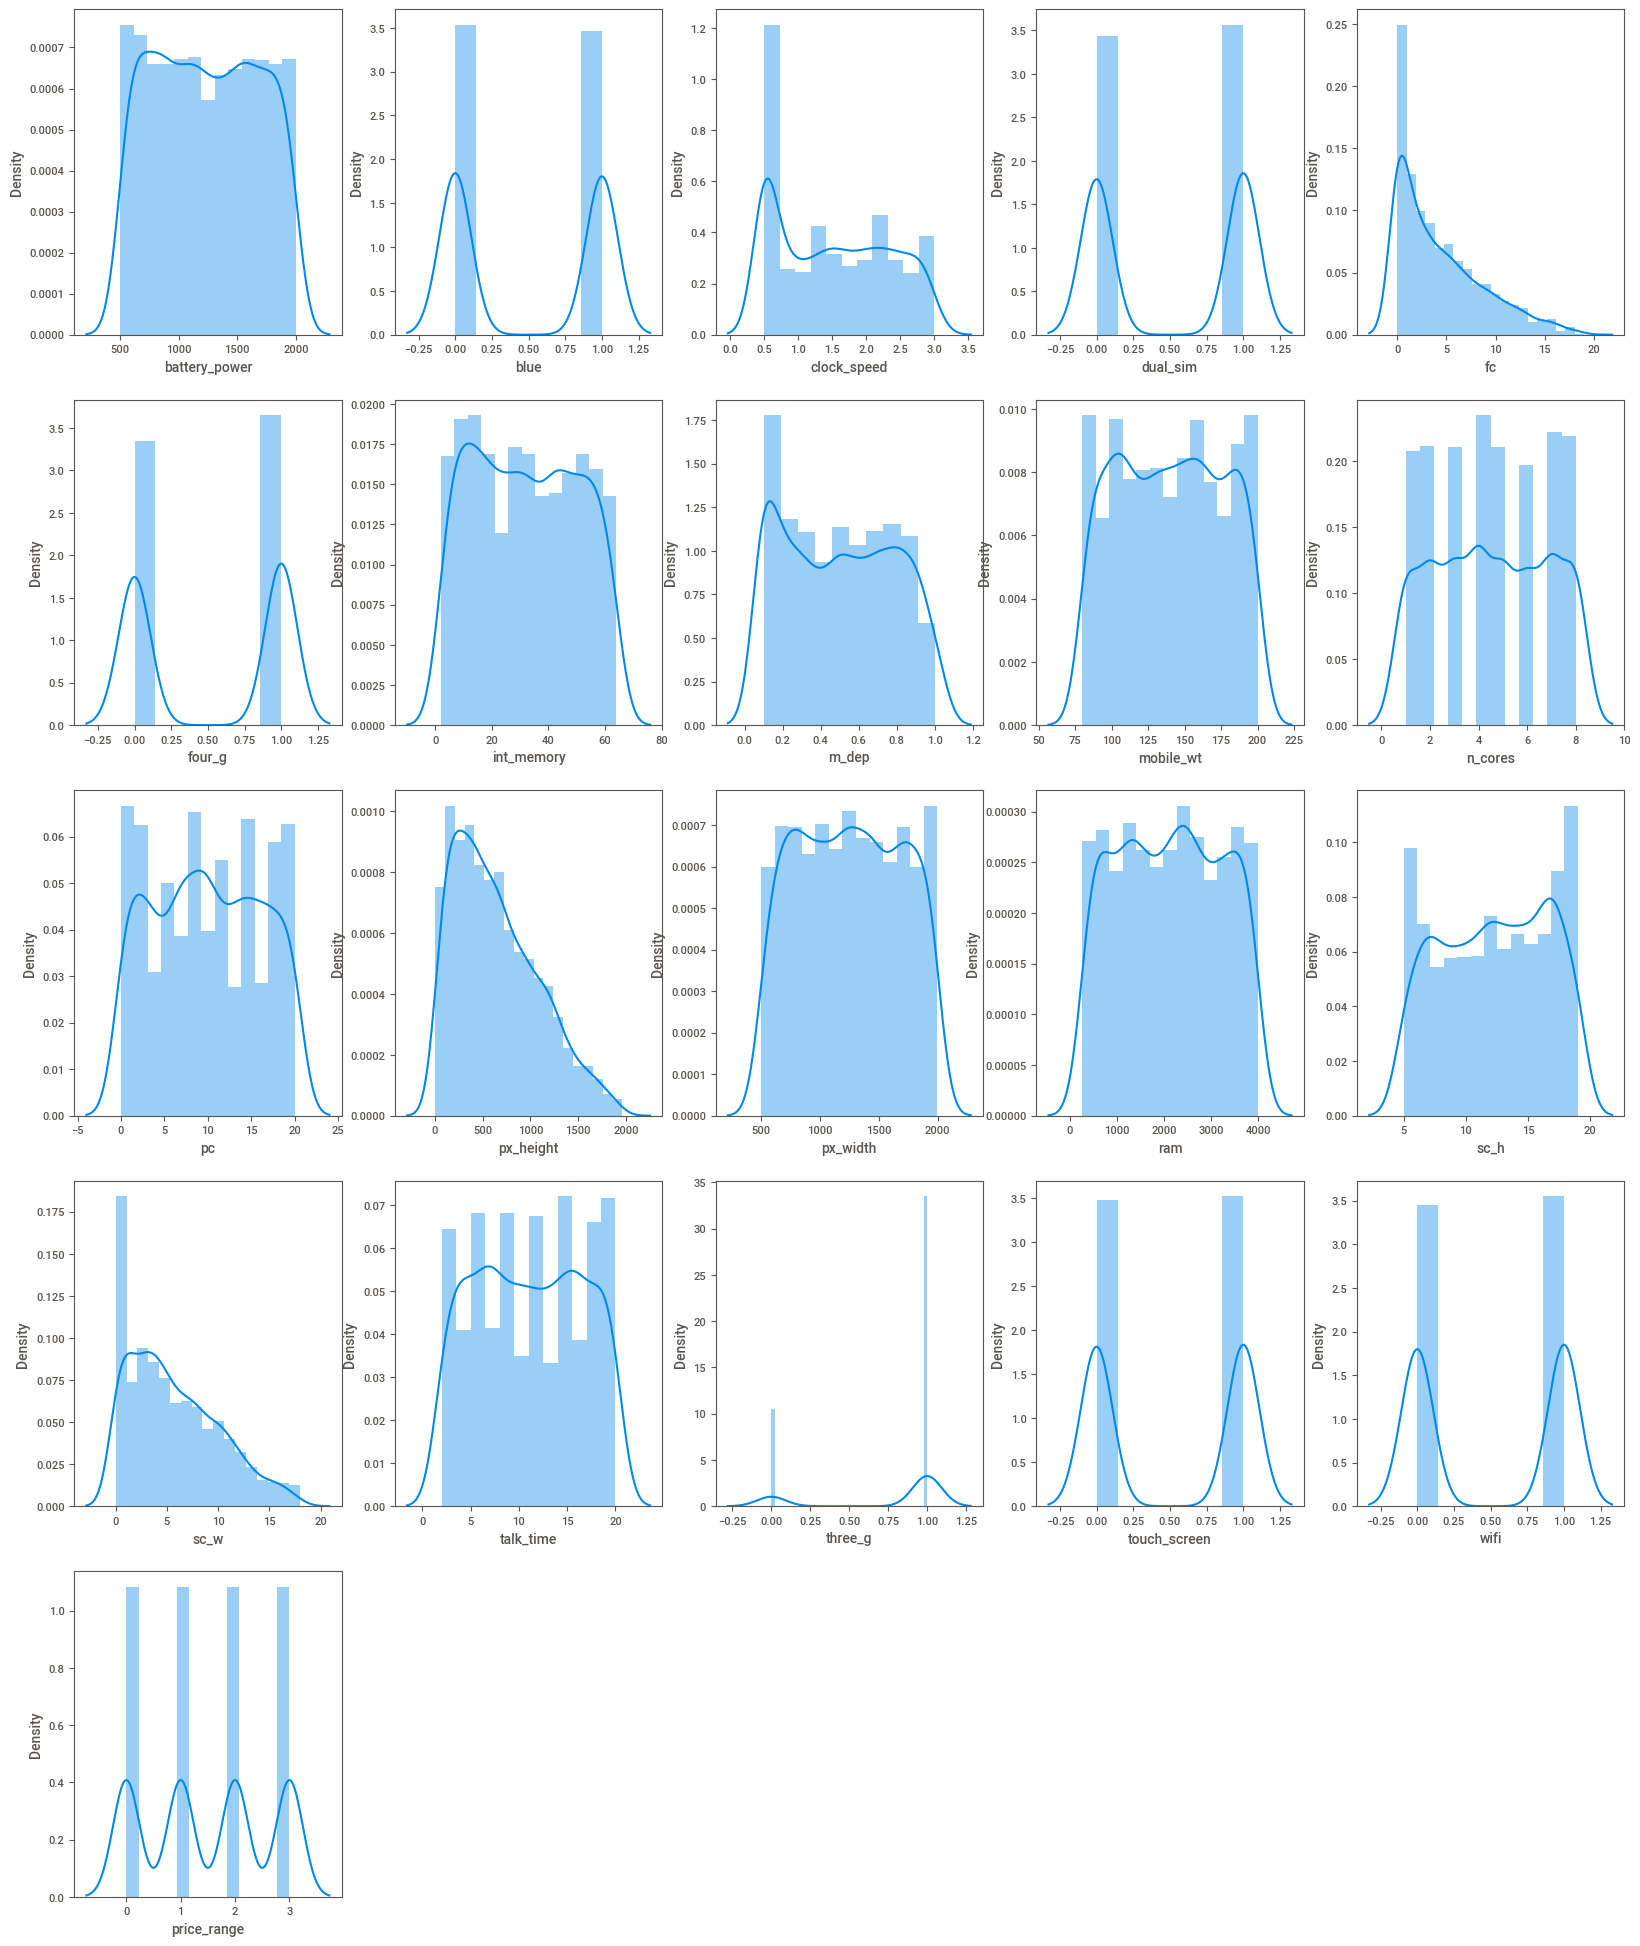

In [15]:
plt.figure(figsize=(20,25), facecolor='white')#defining  canvas size
plotnumber = 1 #maintian count for graph

for column in data:#accessing the columns
    if plotnumber<=21 :# as there are 10 columns in the data
        ax = plt.subplot(5,5,plotnumber)# plotting 10 graphs (5-rows,5-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

## Checking Outliers

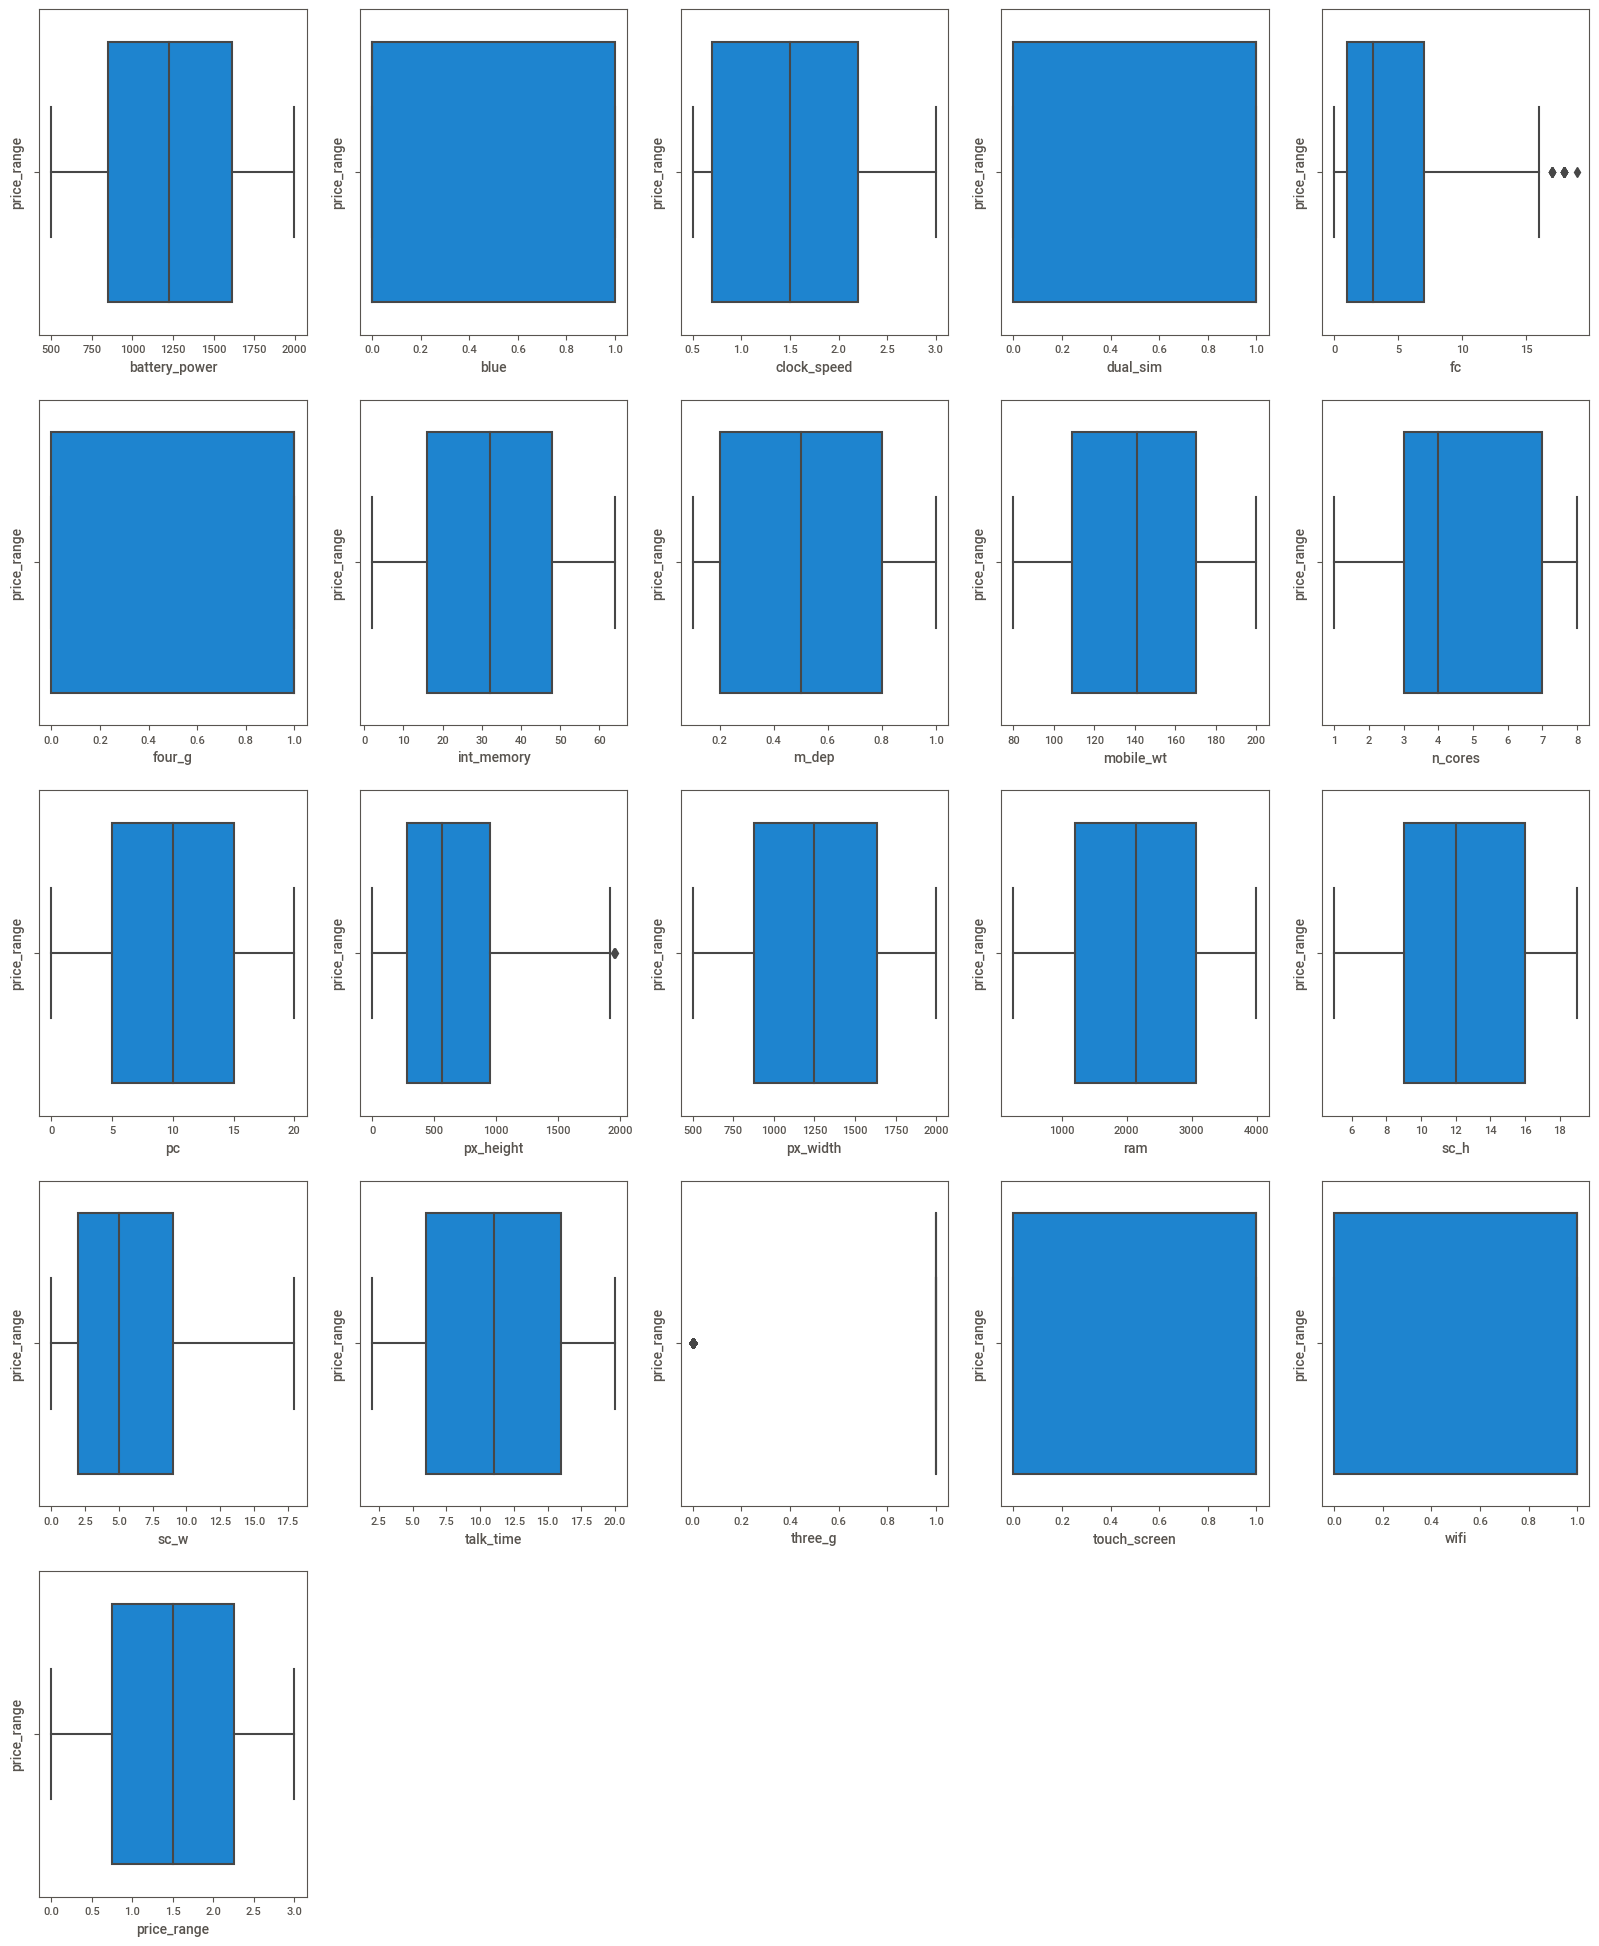

<Figure size 600x400 with 0 Axes>

In [16]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=21:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(x=data[column],hue=data.price_range)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('price_range',fontsize=10)
    plotnumber+=1
plt.show()
plt.tight_layout()

### Handling Outliers

In [17]:
from scipy import stats

In [18]:
IQR=stats.iqr(data.fc,interpolation="midpoint")
Q3=data.fc.quantile(.75)
Q1=data.fc.quantile(.25)
maxm=Q3+1.5*IQR
print(maxm)
minm=Q1-1.5*IQR
print(minm)

16.0
-8.0


In [19]:
data.loc[data['fc']>maxm,'fc']

95      18
169     17
226     18
229     17
300     17
305     18
372     17
584     17
1387    18
1406    18
1416    18
1549    17
1554    18
1693    18
1705    19
1880    18
1882    18
1888    18
Name: fc, dtype: int64

In [20]:
len(data.loc[data['fc']>maxm, 'fc'])

18

### checking percentage of outliers

In [21]:
(18*100)/2000

0.9

In [22]:
len(data.loc[data['fc']>minm, 'fc'])

2000

In [23]:
data.loc[data['fc']<minm, 'fc']

Series([], Name: fc, dtype: int64)

### replacing outleirs with median for FC

In [24]:
data.loc[data['fc']>maxm,'fc']=np.median(data.fc)

<AxesSubplot:xlabel='fc'>

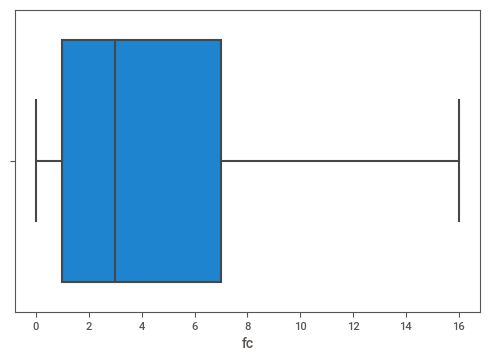

In [25]:
sns.boxplot(data['fc'])

### Hence outliers for FC has been cleared

<AxesSubplot:xlabel='px_height'>

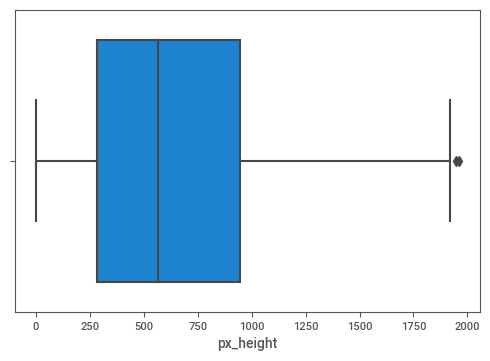

In [26]:
sns.boxplot(data['px_height'])

In [27]:
IQR=stats.iqr(data.px_height,interpolation='midpoint')
IQR
Q3=data.px_height.quantile(.75)
Q1=data.px_height.quantile(.25)
maxm=Q3+1.5*IQR
print(maxm)
minm=Q1-1.5*IQR
print(minm)


1944.75
-714.75


In [28]:
data.loc[data['px_height']>maxm,'px_height']

988     1949
1771    1960
Name: px_height, dtype: int64

In [29]:
data.loc[data['px_height']<minm,'px_height']

Series([], Name: px_height, dtype: int64)

In [30]:
data.loc[data['px_height']>maxm,'px_height']=np.median(data.px_height)

<AxesSubplot:xlabel='px_height'>

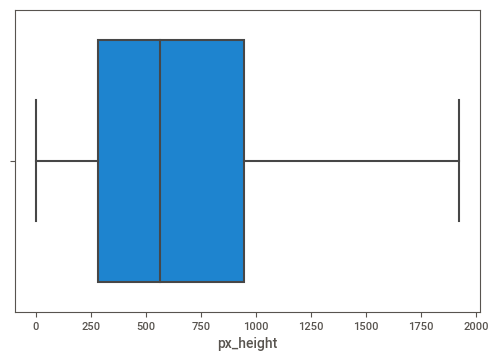

In [31]:
sns.boxplot(data['px_height'])

### Hence outliers for px_height has been cleared

<AxesSubplot:xlabel='three_g'>

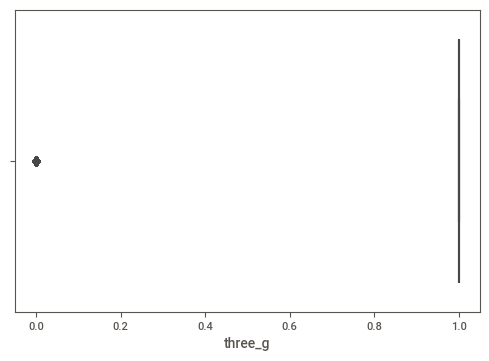

In [32]:
sns.boxplot(data['three_g'])

### Hence all outliers are cleared

### Feature Selection

<AxesSubplot:>

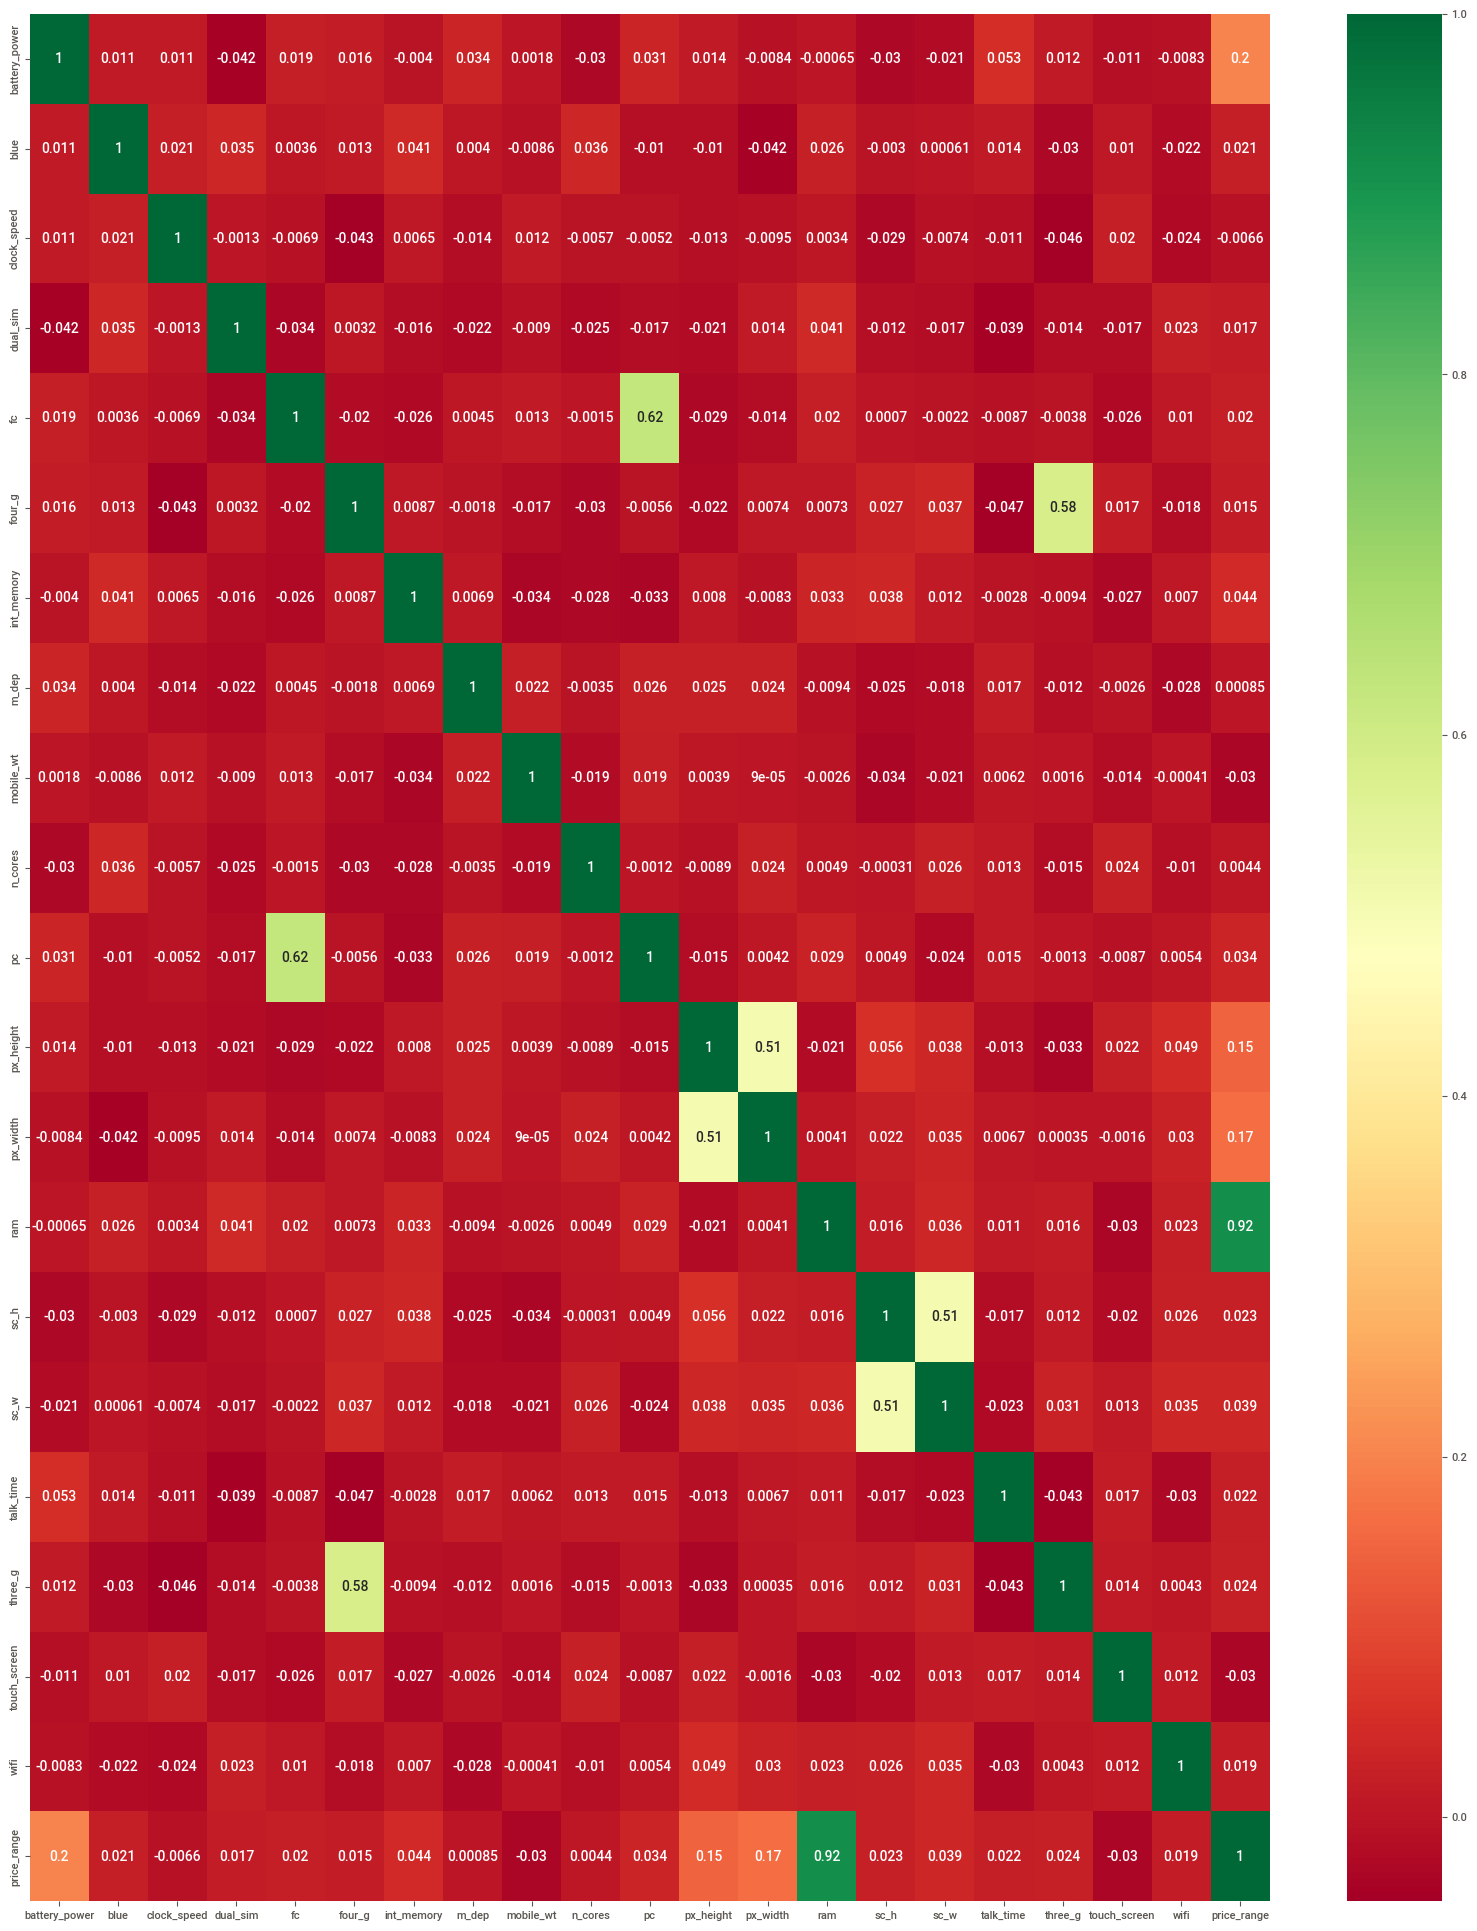

In [33]:
## Checking correlation

plt.figure(figsize=(20, 25))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})#plotting heat map to check correlation

## Model Creation

In [34]:
x=data.drop(['price_range'],axis=1)
y=data.price_range

In [35]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [36]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [37]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()## objet creation
x_scaled = scaler.fit_transform(x)# scaling independent variables

In [38]:
x_scaled #Scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=40)

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()#object creation of logistic regression
log_reg.fit(x_train,y_train)#training model with training data

LogisticRegression()

In [41]:
## Balacing the data                    
from collections import Counter
from imblearn.over_sampling import SMOTE# importing counter to check count of each label
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(x_train,y_train)
print(Counter(y_sm))

Counter({1: 500, 2: 500, 3: 500, 0: 500})
Counter({0: 381, 2: 381, 1: 381, 3: 381})


In [42]:
n_pre=log_reg.predict(x_train)# predicting y_train 

In [43]:
y_pred = log_reg.predict(x_test) # testing model 

In [44]:
y_train.shape # to know the shape of y_train (rows and columns)

(1500,)

In [45]:
y_pred.shape # to know the shape of y_pred (rows and columns )

(500,)

In [46]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()
dt.fit(X_sm,y_sm)
y_hat=dt.predict(x_test)
y_hat

array([1, 0, 2, 0, 1, 3, 0, 2, 1, 1, 2, 3, 0, 3, 1, 0, 0, 1, 0, 1, 2, 1,
       1, 0, 1, 2, 1, 0, 0, 3, 1, 1, 1, 2, 1, 1, 0, 3, 3, 3, 1, 0, 1, 3,
       1, 1, 0, 3, 0, 3, 1, 1, 0, 2, 0, 0, 2, 2, 3, 0, 0, 1, 3, 1, 0, 2,
       1, 3, 3, 2, 3, 2, 0, 3, 3, 0, 0, 1, 1, 1, 2, 0, 1, 0, 2, 3, 3, 3,
       1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 0, 0, 3, 3, 0, 3, 3, 3, 1, 2, 1,
       0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 3, 1, 1, 0, 2,
       2, 0, 1, 3, 1, 1, 1, 3, 2, 1, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 2, 1,
       3, 3, 2, 2, 3, 2, 1, 3, 1, 0, 3, 3, 3, 0, 2, 2, 0, 2, 0, 3, 0, 3,
       1, 3, 3, 2, 2, 1, 0, 2, 3, 2, 3, 0, 1, 0, 3, 3, 1, 3, 0, 3, 3, 1,
       2, 1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 2, 0, 3, 2, 2, 2, 2, 0, 1, 1, 0,
       0, 2, 3, 3, 2, 2, 3, 3, 3, 0, 2, 1, 0, 3, 1, 1, 3, 3, 2, 0, 2, 2,
       2, 1, 0, 2, 0, 3, 3, 3, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 3, 3,
       2, 1, 0, 0, 2, 1, 2, 3, 1, 3, 0, 0, 0, 0, 2, 3, 2, 2, 3, 0, 1, 3,
       2, 0, 3, 2, 3, 0, 0, 3, 2, 0, 3, 0, 0, 1, 0,

In [47]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier() #object creation for decision tree  
dt.fit(x_train,y_train) #training the model

DecisionTreeClassifier()

In [48]:
y_train_predict=dt.predict(x_train)#predicting training data to check training performance 
y_train_predict

array([0, 0, 2, ..., 0, 3, 3], dtype=int64)

In [49]:
y_test_pred=dt.predict(x_test) #prediction
y_test_pred #predicted values for testing

array([0, 0, 2, 0, 1, 3, 0, 2, 1, 1, 2, 3, 0, 3, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 2, 1, 0, 0, 3, 0, 1, 1, 2, 1, 1, 0, 3, 3, 3, 1, 0, 1, 3,
       1, 1, 0, 3, 0, 3, 1, 1, 0, 2, 0, 0, 2, 2, 3, 0, 0, 1, 3, 1, 0, 2,
       1, 2, 3, 2, 3, 2, 0, 3, 3, 0, 0, 1, 1, 1, 2, 0, 1, 0, 2, 3, 3, 3,
       1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 0, 0, 3, 3, 0, 3, 3, 3, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 1, 3, 1, 1, 0, 2,
       1, 0, 1, 3, 1, 2, 1, 3, 1, 1, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 2, 1,
       3, 3, 2, 2, 3, 2, 1, 3, 1, 0, 3, 3, 3, 0, 2, 2, 0, 2, 0, 3, 0, 3,
       0, 3, 3, 2, 2, 1, 0, 2, 3, 2, 3, 0, 1, 0, 3, 3, 1, 3, 0, 3, 3, 1,
       2, 1, 1, 0, 3, 1, 0, 3, 3, 1, 0, 2, 0, 3, 1, 2, 2, 2, 0, 1, 1, 0,
       0, 2, 3, 3, 2, 2, 3, 3, 3, 0, 2, 0, 0, 3, 1, 1, 3, 3, 2, 0, 2, 2,
       2, 0, 0, 2, 0, 3, 3, 3, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 3, 3,
       2, 1, 0, 0, 2, 1, 2, 3, 1, 3, 0, 0, 0, 0, 2, 3, 2, 2, 3, 0, 1, 3,
       2, 0, 2, 2, 3, 0, 0, 3, 2, 1, 3, 0, 0, 1, 0,

In [50]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
##Training score
y_train_predict=dt.predict(x_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
print(acc_train*100,'%')

100.0 %


In [51]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       371
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       381

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [52]:
pd.crosstab(y_train,y_train_predict)

col_0,0,1,2,3
price_range,,,,
0,368,0,0,0
1,0,371,0,0
2,0,0,380,0
3,0,0,0,381


In [53]:
## test acc
test_acc=accuracy_score(y_test,y_test_pred)#testing accuracy 
print(test_acc*100,'%')

83.2 %


In [55]:
## scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [56]:
X_scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [57]:
## splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [58]:
## taking optimal k to determine how many nearest neighbors  to create
from sklearn.neighbors import KNeighborsClassifier
# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [59]:
error_rate

[0.516, 0.554, 0.526, 0.504, 0.486, 0.48, 0.48, 0.468, 0.466, 0.45]

Text(0, 0.5, 'Error Rate')

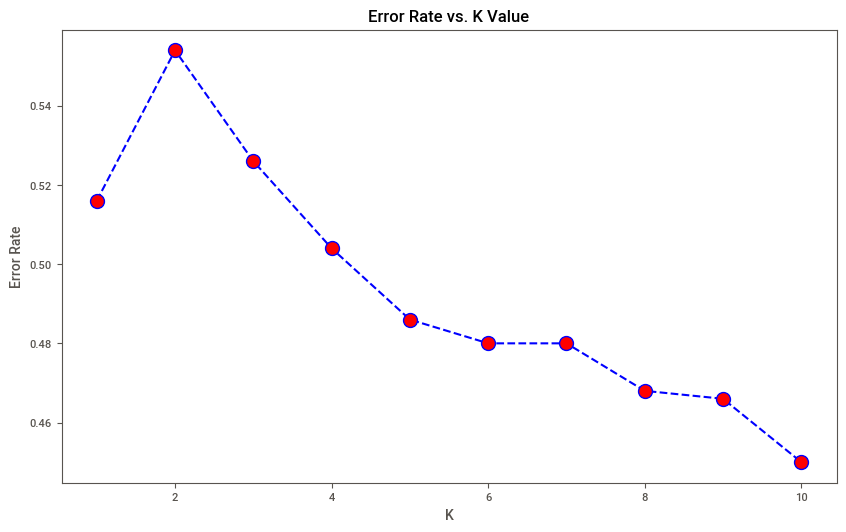

In [60]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
## Error calculation for regression task
# Donot run this code on current dataset
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.9549869109050658
RMSE value for k=  2 is: 0.802807573457052
RMSE value for k=  3 is: 0.7258711241597154
RMSE value for k=  4 is: 0.7158910531638176
RMSE value for k=  5 is: 0.7014841409468927
RMSE value for k=  6 is: 0.6758533700276842
RMSE value for k=  7 is: 0.6645851859526777
RMSE value for k=  8 is: 0.6627358070905781
RMSE value for k=  9 is: 0.6597792373023788
RMSE value for k=  10 is: 0.653253396470313
RMSE value for k=  11 is: 0.6637608849553386
RMSE value for k=  12 is: 0.6648725859558021
RMSE value for k=  13 is: 0.6682043410665022
RMSE value for k=  14 is: 0.6744309770889404
RMSE value for k=  15 is: 0.6715951161228021
RMSE value for k=  16 is: 0.6672998295369181
RMSE value for k=  17 is: 0.6707378574051128
RMSE value for k=  18 is: 0.6685436539852507
RMSE value for k=  19 is: 0.6714890221926251
RMSE value for k=  20 is: 0.6722648287691392


In [62]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# Predict 
y_pred = knn.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [65]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.474


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.70      0.60       132
           1       0.30      0.35      0.32       118
           2       0.37      0.30      0.33       120
           3       0.76      0.52      0.62       130

    accuracy                           0.47       500
   macro avg       0.49      0.47      0.47       500
weighted avg       0.49      0.47      0.47       500



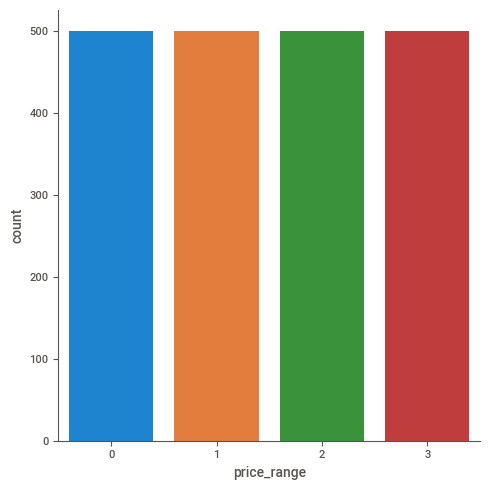

In [67]:
## checking the balance of traget
sns.catplot(x='price_range',data=data,kind='count')

In [68]:
!pip install imblearn

In [69]:
!pip install delayed

In [70]:
# Apply SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [71]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [72]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 382, 2: 380, 3: 370, 0: 368})
SMOTE Classes Counter({1: 382, 2: 382, 3: 382, 0: 382})


In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_smote, y_smote)

KNeighborsClassifier(n_neighbors=3)

In [74]:
# Predict the output for X_test
y_pred = knn.predict(X_test)

In [75]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.476


In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       132
           1       0.30      0.35      0.32       118
           2       0.36      0.29      0.32       120
           3       0.75      0.54      0.63       130

    accuracy                           0.48       500
   macro avg       0.49      0.47      0.47       500
weighted avg       0.49      0.48      0.48       500



In [78]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=3)

In [79]:
## balancing the data

# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [80]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [81]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 500, 2: 500, 3: 500, 0: 500})
SMOTE Classes Counter({3: 383, 2: 383, 0: 383, 1: 383})


In [83]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [84]:
y_pred=svclassifier.predict(x_train)

In [85]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [86]:
#f1 Score
f1=f1_score(y_train,y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].